In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

aredeylarger_sentiment_analysis_data_path = kagglehub.dataset_download('aredeylarger/sentiment-analysis-data')
aredeylarger_sentiment_analysis_data_ii_path = kagglehub.dataset_download('aredeylarger/sentiment-analysis-data-ii')

print('Data source import complete.')


In [ ]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

import nltk
# Download 'stopwords' before using it.
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
nltk.download ("punkt")



from tqdm import tqdm

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


#Vader
import nltk
nltk.download( "vader_lexicon" )

#from vader sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


from sklearn.metrics import classification_report, accuracy_score

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading vader_lexicon: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


/usr/local/lib/python3.10/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


**LOADING DATA AND DATA MAPPING**

In [ ]:
import os
folder_path ='/kaggle/input/sentiment-analysis-data-ii/'
os.listdir(folder_path)

['e commerce reviews train II.csv']

In [ ]:
# Replace 'your_dataset.csv' with the name of your file
file_path = '/kaggle/input/sentiment-analysis-data-ii/e commerce reviews train II.csv'


df_train = pd.read_csv(file_path)

df_train.head()

,labels,text
0,__label__2,Stuning even for the non-gamer: This sound tra...
1,__label__2,The best soundtrack ever to anything.: I'm rea...
2,__label__2,Amazing!: This soundtrack is my favorite music...
3,__label__2,Excellent Soundtrack: I truly like this soundt...
4,__label__2,"Remember, Pull Your Jaw Off The Floor After He..."


In [ ]:
# Replace 'your_dataset.csv' with the name of your file
file_path = '/kaggle/input/sentiment-analysis-data/e commerce reviews test.csv'


df_test = pd.read_csv(file_path)

df_test.head()

,labels,text
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...
1,__label__2,One of the best game music soundtracks - for a...
2,__label__1,Batteries died within a year ...: I bought thi...
3,__label__2,"works fine, but Maha Energy is better: Check o..."
4,__label__2,Great for the non-audiophile: Reviewed quite a...


In [ ]:
mapping  =  {
    "__label__1": "negative",
    "__label__2": "positive"
}

In [ ]:
df_train['labels'] = df_train['labels'].map(mapping)
df_train.head()

,labels,text
0,positive,Stuning even for the non-gamer: This sound tra...
1,positive,The best soundtrack ever to anything.: I'm rea...
2,positive,Amazing!: This soundtrack is my favorite music...
3,positive,Excellent Soundtrack: I truly like this soundt...
4,positive,"Remember, Pull Your Jaw Off The Floor After He..."


In [ ]:
df_test['labels'] = df_test['labels'].map(mapping)
df_test.head()

,labels,text
0,positive,Great CD: My lovely Pat has one of the GREAT v...
1,positive,One of the best game music soundtracks - for a...
2,negative,Batteries died within a year ...: I bought thi...
3,positive,"works fine, but Maha Energy is better: Check o..."
4,positive,Great for the non-audiophile: Reviewed quite a...


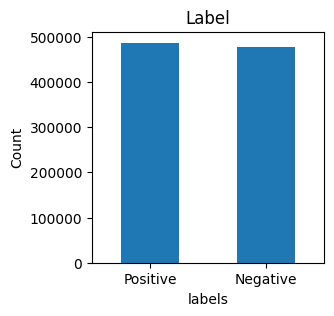

In [ ]:
plt.figure(figsize = (3,3))
st = df_train['labels'].value_counts().plot(kind='bar')
st.set_ylabel('Count', size=10)
st.set_xticklabels(['Positive','Negative'], rotation=0)
st.set_title('Label');
plt.show()

In [ ]:
df_train.labels.value_counts()

labels
positive    486775
negative    476367
Name: count, dtype: int64

In [ ]:
df_test.labels.value_counts()

labels
positive    200000
negative    200000
Name: count, dtype: int64

**REMOVING STOPSWORDS**

In [ ]:
#tokenization

def remove_stopwords(words):
     word = nltk.word_tokenize(words)
     new_word = [word for word in word if word not in stop_words]
     new_word = " ".join(new_word)
     return new_word

In [ ]:
text = "i love this man JESUS, he saves me daily"
remove_stopwords(text)

'love man JESUS , saves daily'

In [ ]:
df_train["text"].head(10).apply(remove_stopwords)

0    Stuning even non-gamer : This sound track beau...
1    The best soundtrack ever anything . : I 'm rea...
2    Amazing ! : This soundtrack favorite music tim...
3    Excellent Soundtrack : I truly like soundtrack...
4    Remember , Pull Your Jaw Off The Floor After H...
5    absolute masterpiece : I quite sure actually t...
6    Buyer beware : This self-published book , want...
7    Glorious story : I loved Whisper wicked saints...
8    A FIVE STAR BOOK : I finished reading Whisper ...
9    Whispers Wicked Saints : This easy read book m...
Name: text, dtype: object

In [ ]:
total_rows = len(df_train)
tqdm.pandas(total = total_rows)
df_train["new_text"] = df_train["text"].progress_apply(remove_stopwords)

100%|██████████| 963142/963142 [14:31<00:00, 1105.00it/s]


In [ ]:
df_train.head()

,labels,text,new_text
0,positive,Stuning even for the non-gamer: This sound tra...,Stuning even non-gamer : This sound track beau...
1,positive,The best soundtrack ever to anything.: I'm rea...,The best soundtrack ever anything . : I 'm rea...
2,positive,Amazing!: This soundtrack is my favorite music...,Amazing ! : This soundtrack favorite music tim...
3,positive,Excellent Soundtrack: I truly like this soundt...,Excellent Soundtrack : I truly like soundtrack...
4,positive,"Remember, Pull Your Jaw Off The Floor After He...","Remember , Pull Your Jaw Off The Floor After H..."


In [ ]:
total_rows = len(df_test)
tqdm.pandas(total = total_rows)
df_test["new_text"] = df_test["text"].progress_apply(remove_stopwords)

 48%|████▊     | 193707/400000 [02:55<03:10, 1084.96it/s]

In [ ]:
df_test.head()

In [ ]:
#TFIDF
tf_vectorizer = TfidfVectorizer()
train_tf = tf_vectorizer.fit_transform(df_train['new_text'])
test_tf = tf_vectorizer.transform(df_test['new_text'])

In [ ]:
word_analyzer =  SentimentIntensityAnalyzer()

In [ ]:
def sentence_analyzer(sentence):
    s_score = word_analyzer.polarity_scores(sentence)
    compound_score = s_score['compound']

    if compound_score > 0:
        return 'positive'
    else:
        return 'negative'



In [ ]:
#applying vader
df_train['vader_app'] = df_train['new_text'].apply(sentence_analyzer)
df_train.head()

In [ ]:
#applying vadar om test dataset
df_test['vader_app'] = df_test['new_text'].apply(sentence_analyzer)
df_test.head()

In [ ]:
from transformers import GPT2Tokenizer, TFGPT2Model
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')
model = TFGPT2Model.from_pretrained('distilgpt2')
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='tf')
output = model(encoded_input)


In [ ]:
# Split the train data into training and validation sets
train_df, val_df = train_test_split(df_train, test_size=0.2, random_state=42)

In [ ]:
# Convert pandas DataFrames to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(df_test)

In [ ]:
from transformers import RobertaTokenizer

# Load the tokenizer from the local directory
tokenizer = RobertaTokenizer.from_pretrained("/kaggle/input/sentiment-analysis-data-ii/roberta-base-tokenizer")

In [ ]:
import os

# Check if a local directory named 'roberta-base' exists
if os.path.exists("roberta-base"):
    print("A local directory named 'roberta-base' exists. Rename or move it.")
else:
    print("No conflicting directory found.")

In [ ]:
# Load the RoBERTa tokenizer
from transformers import RobertaTokenizer

# Use DistilRoBERTa instead
tokenizer = RobertaTokenizer.from_pretrained("distilroberta-base")



# Tokenize the datasets
def tokenize_function(examples):
    return tokenizer(examples["cleaned_text"], padding="max_length", truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

In [ ]:
# Set the format for PyTorch
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask"])


In [ ]:
# Load the RoBERTa model for sequence classification
model = RobertaForSequenceClassification.from_pretrained("distilroberta-base", num_labels=len(train_data['label'].unique()))

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=2,
    save_steps=500,
    logging_dir="./logs",
    logging_steps=10,
)


In [ ]:
# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# Train the model
trainer.train()

In [ ]:
# Predict on the test dataset
predictions = trainer.predict(test_dataset)
predicted_labels = torch.argmax(torch.tensor(predictions.predictions), dim=-1).numpy()

# Add the predicted labels to the test data
test_data["predicted_label"] = predicted_labels